In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = "https://drive.google.com/open?id=1bdW1XiEI95DCRwziBf5aXxA4oPl6O6N1"
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
import pandas as pd
downloaded.GetContentFile('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')  
df = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

1bdW1XiEI95DCRwziBf5aXxA4oPl6O6N1


In [5]:
df.shape

(5000, 24)

#**Amazon Review Dataset**

In [8]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,NaN,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [9]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [0]:
dataset= df[['reviews.text','categories','reviews.rating']]

In [15]:
dataset.head()

,reviews.text,categories,reviews.rating
0,I thought it would be as big as small paper bu...,"Computers,Electronics Features,Tablets,Electro...",3
1,This kindle is light and easy to use especiall...,"Computers,Electronics Features,Tablets,Electro...",5
2,Didnt know how much i'd use a kindle so went f...,"Computers,Electronics Features,Tablets,Electro...",4
3,I am 100 happy with my purchase. I caught it o...,"Computers,Electronics Features,Tablets,Electro...",5
4,Solid entry level Kindle. Great for kids. Gift...,"Computers,Electronics Features,Tablets,Electro...",5


# **Data preprocessing**

In [20]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import nltk
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
from string import punctuation
custom = stop_words+list(punctuation)
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")

def my_tokenizer(s):
   s = s.lower()
   tokens = nltk.tokenize.word_tokenize(s)
   tokens = [t for t in tokens if len(t)>2] #remove words lesser than 2 in length
   tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] #lemmatize words
   tokens = [t for t in tokens if t not in custom] #remove stopwords and punctuation
   tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove digits
   return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
corpus = dataset["reviews.text"].tolist()

In [23]:
len(corpus)

5000

In [0]:
cleaned_text = []
for x in corpus:
  cleaned_text.append(my_tokenizer(x))
joined_text = []
for x in cleaned_text:
  joined_text.append(' '.join(x))

In [36]:
joined_text

['thought would big small paper turn like palm think small read ... comfortable regular Kindle Would definitely recommend paperwhite instead',
 'This kindle light easy use especially beach',
 'Didnt know much use kindle went lower end happy even little dark',
 "happy purchase caught sale really good price normally real book person year old love ripping page The Kindle prevents extremely portable fit better purse giant book loaded lot book finish one start another without store serf need picked one Paperwhite price wa unbeatable difference could see wa one wa n't backlit simple book light Dollar tree solves issue This second Kindle first old Keyboard model put fell love keyboard Lol likely n't last",
 'Solid entry level Kindle Great kid Gifted kid friend love use read iPads battery good higher model bit better',
 "This make excellent ebook reader n't expect much device except read basic ebooks The good thing cheap good read sun",
 'ordered daughter black paperwhite love read quite bit l

In [37]:
pd.DataFrame(joined_text).head()

,0
0,thought would big small paper turn like palm t...
1,This kindle light easy use especially beach
2,Didnt know much use kindle went lower end happ...
3,happy purchase caught sale really good price n...
4,Solid entry level Kindle Great kid Gifted kid ...


In [0]:
cleaned_df = pd.DataFrame(joined_text)

In [39]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
text_list = cleaned_df[0].tolist()

In [49]:
text_list[:5]

['thought would big small paper turn like palm think small read ... comfortable regular Kindle Would definitely recommend paperwhite instead',
 'This kindle light easy use especially beach',
 'Didnt know much use kindle went lower end happy even little dark',
 "happy purchase caught sale really good price normally real book person year old love ripping page The Kindle prevents extremely portable fit better purse giant book loaded lot book finish one start another without store serf need picked one Paperwhite price wa unbeatable difference could see wa one wa n't backlit simple book light Dollar tree solves issue This second Kindle first old Keyboard model put fell love keyboard Lol likely n't last",
 'Solid entry level Kindle Great kid Gifted kid friend love use read iPads battery good higher model bit better']

In [0]:
from nltk import pos_tag, pos_tag_sents
final_corpus= []
for i in range(len(text_list)):
  jj = nltk.word_tokenize(text_list[i])
  jj = [word for word, pos in pos_tag(jj) if pos.startswith('JJ')]
  sentjj = " ".join(jj)
  
  final_corpus.append(sentjj)
  # Extracting Adjectives

# final_corpus1= []
# for i in range(len(corpus1)):
#     jj = word_tokenize(corpus1[i])
#     jj = [word for word, pos in pos_tag(jj) if pos.startswith('JJ')]
#     sentjj = " ".join(jj)
    
    

In [62]:
final_corpus

['big small small comfortable regular paperwhite',
 'kindle easy',
 'kindle lower happy little',
 'happy good real old portable fit better giant finish unbeatable wa backlit simple light second old last',
 'Solid good higher',
 'excellent much read basic good good',
 'daughter black bit larger crazy thick easy last awesome public online library free public library read free e-books straight',
 'dead',
 'best new',
 '',
 'want good digital lightweight functional last long easy bright',
 'easy real',
 'Good',
 'easy',
 'readable normal dictionary easy',
 'doe difficult read',
 'great',
 'wa easy read',
 'good',
 'great external little kindle great',
 'kindle lengthy online minuet female speak english',
 'nice greatest lit w/o light paperwhite',
 'simple',
 'weight easy',
 'last awesome',
 '',
 'muscular able much',
 '',
 'several expect great several different',
 'wish higher decent light good easy update whole le advertised battery last much',
 '',
 'Simple great',
 'current old',
 'tou

In [0]:
adj_df = pd.DataFrame(final_corpus)

In [65]:
adj_df.head()

,0
0,big small small comfortable regular paperwhite
1,kindle easy
2,kindle lower happy little
3,happy good real old portable fit better giant ...
4,Solid good higher


In [0]:
adj_df["reviews.rating"] = dataset["reviews.rating"]
adj_df.columns = [["adj text", "review rating" ]]

In [76]:
adj_df.head()

,adj text,review rating
0,big small small comfortable regular paperwhite,3
1,kindle easy,5
2,kindle lower happy little,4
3,happy good real old portable fit better giant ...,5
4,Solid good higher,5


## **Word cloud**

In [0]:
 import matplotlib.pyplot as plt
from wordcloud import WordCloud

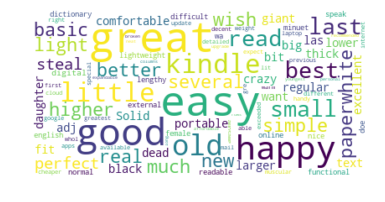

In [86]:
text = str(adj_df["adj text"])
wordcloud = WordCloud(max_font_size=50, random_state=21, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Sentiment Analysis**

In [0]:
from textblob import TextBlob

In [0]:
#Sentiment Analysis

remarks= []
for i in range(len(final_corpus)):
    blob = TextBlob(final_corpus[i])
    sentiment = blob.sentiment
    
    remarks.append(sentiment)

In [96]:
analysis = pd.DataFrame(remarks)
analysis.head()

,polarity,subjectivity
0,-0.020000,0.355385
1,0.433333,0.833333
2,0.306250,0.750000
3,0.277273,0.465801
4,0.316667,0.400000


In [0]:
adj_df["polarity"] = analysis["polarity"]
adj_df["subjectivity"] = analysis["subjectivity"]
adj_df["reviews.text"] = dataset["reviews.text"]

In [0]:
adj_df.columns = [["Adjective words", "Rating", "polarity", "subjectivity", "Review"]]

In [104]:
adj_df.head()

,Adjective words,Rating,polarity,subjectivity,Review
0,big small small comfortable regular paperwhite,3,-0.020000,0.355385,I thought it would be as big as small paper bu...
1,kindle easy,5,0.433333,0.833333,This kindle is light and easy to use especiall...
2,kindle lower happy little,4,0.306250,0.750000,Didnt know how much i'd use a kindle so went f...
3,happy good real old portable fit better giant ...,5,0.277273,0.465801,I am 100 happy with my purchase. I caught it o...
4,Solid good higher,5,0.316667,0.400000,Solid entry level Kindle. Great for kids. Gift...
